In [111]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import acos
import seaborn as sns

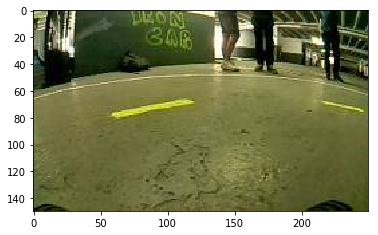

In [120]:
image = cv2.imread('resources/bright-line.jpg', cv2.IMREAD_COLOR)

def display(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    
display(image)

In [10]:
image.shape

(150, 250, 3)

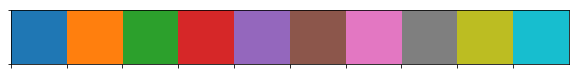

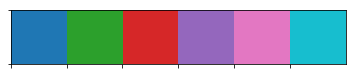

In [79]:
colormap = sns.color_palette()
sns.palplot(colormap)
element = [ colormap[0] ]
element += colormap[2:5]
element.append(colormap[6])
element.append(colormap[9])
sns.palplot(element)
colors = np.asarray(element) * (np.ones((len(element), 3)) * 255)

-1.2455614659411132


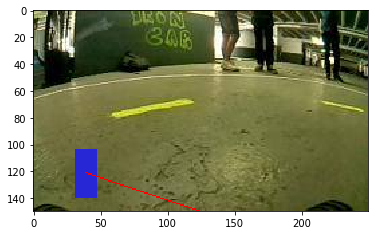

In [119]:
test = image.copy()

def draw_rect(test):
    # position can be everywhere on the image except the last pixels to have space to put the object
    x = np.random.randint(test.shape[1] * 7 / 10)
    y = np.random.randint(test.shape[0] * 7 / 10)
    # object cannot be bigger than 30% of the image width
    x_size = np.random.randint(test.shape[1] * 3 / 10)
    # object cannot be bigger than 30% of the image height
    y_size = np.random.randint(test.shape[0] *  3 / 10)
    # color of the object
    color = colors[np.random.randint(len(colors))]
    cv2.rectangle(test, (x, y), (x + x_size, y + y_size), color, cv2.FILLED)
    
    center_point = (x + x_size // 2, y + y_size // 2)
    car_pos = (test.shape[1] // 2, test.shape[0])
    cv2.line(test, center_point, car_pos, (0, 0, 255))
    
    vect = np.asarray(center_point) - np.asarray(car_pos)
    vect[1] = -vect[1]
    vect = vect / np.linalg.norm(vect, ord=2)
    angle = acos(vect[1])
    angle = angle if vect[0] > 0 else -angle
    print(angle)
    
    return angle
    
draw_rect(test)
display(test)